# 线性回归

## 实验介绍

线性回归（Linear Regression）是机器学习最经典的算法之一，具有如下特点：

- 自变量服从正态分布；
- 因变量是连续性数值变量；
- 自变量和因变量程线性关系。

本实验主要介绍使用MindSpore在模拟数据上进行线性回归实验，分析自变量和因变量之间的线性关系，即求得一个线性函数。

## 实验目的

- 了解线性回归的基本概念和问题模拟；
- 了解如何使用MindSpore进行线性回归实验。

## 预备知识

- 熟练使用Python。
- 具备一定的机器学习理论知识，如线性回归、损失函数、优化器，训练策略等。
- 了解华为云的基本使用方法，包括[ModelArts（AI开发平台）](https://www.huaweicloud.com/product/modelarts.html)、[训练作业](https://support.huaweicloud.com/engineers-modelarts/modelarts_23_0238.html)等功能。华为云官网：https://www.huaweicloud.com
- 了解并熟悉MindSpore AI计算框架，MindSpore官网：https://www.mindspore.cn/

## 实验环境

- MindSpore 0.5.0（MindSpore版本会定期更新，本指导也会定期刷新，与版本配套）；
- 华为云ModelArts（控制台左上角选择“华北-北京四”）：ModelArts是华为云提供的面向开发者的一站式AI开发平台，集成了昇腾AI处理器资源池，用户可以在该平台下体验MindSpore。

## 实验步骤

### 步骤1 导入MindSpore模块和辅助模块

In [1]:
import os
# os.environ['DEVICE_ID'] = '0'
import numpy as np

import mindspore as ms
from mindspore import nn
from mindspore import context

context.set_context(mode=context.GRAPH_MODE, device_target="Ascend")

### 步骤二 生成模拟数据
根据以下线性函数生成模拟数据，并在其中加入少许扰动。

$$y = -5 * x + 0.1$$

In [2]:
x = np.arange(-5, 5, 0.3)[:32].reshape((32, 1))
y = -5 * x +  0.1 * np.random.normal(loc=0.0, scale=20.0, size=x.shape)

### 步骤三 建模
使用MindSpore提供的[`nn.Dense(1, 1)`算子](https://www.mindspore.cn/api/zh-CN/0.2.0-alpha/api/python/mindspore/mindspore.nn.html#mindspore.nn.Dense)作为线性模型，其中`(1, 1)`表示线性模型的输入和输出皆是1维，即$w$是1x1的矩阵。算子会随机初始化权重$w$和偏置$b$。

$$y = w * x + b$$

采用均方差（Mean Squared Error, MSE）作为损失函数。

采用随机梯度下降（Stochastic Gradient Descent, SGD）对模型进行优化。

In [3]:
net = nn.Dense(1, 1)
loss_fn = nn.loss.MSELoss()
opt = nn.optim.SGD(net.trainable_params(), learning_rate=0.01)
with_loss = nn.WithLossCell(net, loss_fn)
train_step = nn.TrainOneStepCell(with_loss, opt).set_train()

### 步骤四 使用模拟数据对模型进行几代（Epoch）训练：

In [4]:
for epoch in range(20):
    loss = train_step(ms.Tensor(x, ms.float32), ms.Tensor(y, ms.float32))
    print('epoch: {0}, loss is {1}'.format(epoch, loss))

epoch: 0, loss is 191.03662
epoch: 1, loss is 137.56923
epoch: 2, loss is 99.519455
epoch: 3, loss is 72.41922
epoch: 4, loss is 53.13565
epoch: 5, loss is 39.367752
epoch: 6, loss is 29.570751
epoch: 7, loss is 22.636707
epoch: 8, loss is 17.659052
epoch: 9, loss is 14.094089
epoch: 10, loss is 11.589828
epoch: 11, loss is 9.775642
epoch: 12, loss is 8.497474
epoch: 13, loss is 7.5611076
epoch: 14, loss is 6.9201765
epoch: 15, loss is 6.452571
epoch: 16, loss is 6.100116
epoch: 17, loss is 5.856675
epoch: 18, loss is 5.6804886
epoch: 19, loss is 5.5560365


### 步骤五 预测
训练一定的代数后，得到的模型已经十分接近真实的线性函数了。

In [5]:
wb = [x.default_input.asnumpy() for x in net.trainable_params()]
w, b = np.squeeze(wb[0]), np.squeeze(wb[1])
print('The true linear function is y = -5 * x + 0.1')
# works in MindSpore0.3.0 or later.
print('The trained linear model is y = {0} * x + {1}'.format(w, b))

for i in range(-10, 11, 5):
    print('x = {0}, predicted y = {1}'.format(i, net(ms.Tensor([[i]], ms.float32))))

The true linear function is y = -5 * x + 0.1
The trained linear model is y = -4.697922706604004 * x + -0.005672554485499859
x = -10, predicted y = [[46.986515]]
x = -5, predicted y = [[23.490421]]
x = 0, predicted y = [[-0.00567255]]
x = 5, predicted y = [[-23.501766]]
x = 10, predicted y = [[-46.99786]]


### 步骤六 可视化
模拟的样本数据、真实的线性函数和训练得到的线性模型如下图所示：

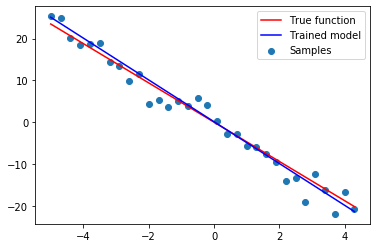

In [6]:
from matplotlib import pyplot as plt
plt.scatter(x, y, label='Samples')
plt.plot(x, w * x +  b, c='r', label='True function')
plt.plot(x, -5 * x +  0.1, c='b', label='Trained model')
plt.legend()
